<a href="https://colab.research.google.com/github/EveYang0630/python_analysis/blob/main/lession7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install requests bs4 pandas matplotlib wget

In [ ]:
import requests
url='https://rate.bot.com.tw/xrt?Lang=zh-TW'
response=requests.get(url)
print(response.text)

In [ ]:
from bs4 import BeautifulSoup

# 使用html.parser建立BeautifulSoup物件
soup = BeautifulSoup(response.text, "html.parser")

#尋找title="牌告匯率"的<table>元素
rate_table=soup.find('table',{'title':'牌告匯率'})
print(rate_table)

In [3]:
from pprint import pprint

#目的：要取出'幣別'，"現今匯率"欄位內的資料。
# 先取出所有幣別與匯率
currency_rows=rate_table.tbody.find_all('tr')  #跳過表頭取出所有tr標籤

rates:list[dict] = []


for row in currency_rows:
    currency_dict = {}

    #取出幣別
    currency = row.find("td", attrs={"data-table": "幣別"}).find("div", class_="visible-phone").text.strip()
    currency_dict['幣別'] = currency

    #取出現金買入
    currency_buy = row.find("td", attrs={"data-table": "本行現金買入"}).text.strip()
    currency_dict['本行現金買入'] = currency_buy

    #取出現金賣出
    currency_send = row.find("td", attrs={"data-table": "本行現金賣出"}).text.strip()
    currency_dict['本行現金賣出'] = currency_send

    #印出幣別與現金買入、現金賣出
    #print(f'幣別{currency} 現金買入{currency_buy} 現金賣出{currency_send}',end='\n✨____________________________________________✔\n')

    rates.append(currency_dict)

pprint(rates)

[{'幣別': '美金 (USD)', '本行現金買入': '32.435', '本行現金賣出': '33.105'},
 {'幣別': '港幣 (HKD)', '本行現金買入': '4.07', '本行現金賣出': '4.274'},
 {'幣別': '英鎊 (GBP)', '本行現金買入': '41.24', '本行現金賣出': '43.36'},
 {'幣別': '澳幣 (AUD)', '本行現金買入': '20.32', '本行現金賣出': '21.1'},
 {'幣別': '加拿大幣 (CAD)', '本行現金買入': '22.35', '本行現金賣出': '23.26'},
 {'幣別': '新加坡幣 (SGD)', '本行現金買入': '24.09', '本行現金賣出': '25'},
 {'幣別': '瑞士法郎 (CHF)', '本行現金買入': '36.51', '本行現金賣出': '37.71'},
 {'幣別': '日圓 (JPY)', '本行現金買入': '0.2127', '本行現金賣出': '0.2255'},
 {'幣別': '南非幣 (ZAR)', '本行現金買入': '-', '本行現金賣出': '-'},
 {'幣別': '瑞典幣 (SEK)', '本行現金買入': '-', '本行現金賣出': '-'},
 {'幣別': '紐元 (NZD)', '本行現金買入': '18.27', '本行現金賣出': '19.12'},
 {'幣別': '泰幣 (THB)', '本行現金買入': '0.8463', '本行現金賣出': '1.0363'},
 {'幣別': '菲國比索 (PHP)', '本行現金買入': '0.5055', '本行現金賣出': '0.6375'},
 {'幣別': '印尼幣 (IDR)', '本行現金買入': '0.00168', '本行現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '本行現金買入': '34.77', '本行現金賣出': '36.11'},
 {'幣別': '韓元 (KRW)', '本行現金買入': '0.02091', '本行現金賣出': '0.02481'},
 {'幣別': '越南盾 (VND)', '本行現金買入': '0.00104', '本行現金賣出'

In [4]:
def filter_func(item:dict)->bool:
    if item['本行現金買入'] == '-':
        return False
    else:
        return True

filtered_rates = list(filter(filter_func,rates))
filtered_rates

[{'幣別': '美金 (USD)', '本行現金買入': '32.435', '本行現金賣出': '33.105'},
 {'幣別': '港幣 (HKD)', '本行現金買入': '4.07', '本行現金賣出': '4.274'},
 {'幣別': '英鎊 (GBP)', '本行現金買入': '41.24', '本行現金賣出': '43.36'},
 {'幣別': '澳幣 (AUD)', '本行現金買入': '20.32', '本行現金賣出': '21.1'},
 {'幣別': '加拿大幣 (CAD)', '本行現金買入': '22.35', '本行現金賣出': '23.26'},
 {'幣別': '新加坡幣 (SGD)', '本行現金買入': '24.09', '本行現金賣出': '25'},
 {'幣別': '瑞士法郎 (CHF)', '本行現金買入': '36.51', '本行現金賣出': '37.71'},
 {'幣別': '日圓 (JPY)', '本行現金買入': '0.2127', '本行現金賣出': '0.2255'},
 {'幣別': '紐元 (NZD)', '本行現金買入': '18.27', '本行現金賣出': '19.12'},
 {'幣別': '泰幣 (THB)', '本行現金買入': '0.8463', '本行現金賣出': '1.0363'},
 {'幣別': '菲國比索 (PHP)', '本行現金買入': '0.5055', '本行現金賣出': '0.6375'},
 {'幣別': '印尼幣 (IDR)', '本行現金買入': '0.00168', '本行現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '本行現金買入': '34.77', '本行現金賣出': '36.11'},
 {'幣別': '韓元 (KRW)', '本行現金買入': '0.02091', '本行現金賣出': '0.02481'},
 {'幣別': '越南盾 (VND)', '本行現金買入': '0.00104', '本行現金賣出': '0.00145'},
 {'幣別': '馬來幣 (MYR)', '本行現金買入': '6.412', '本行現金賣出': '7.937'},
 {'幣別': '人民幣 (CNY)', '本行現金買入':

In [5]:
#清理資料，用map()函數將資料轉換成數字型態

def map_func(item:dict)->dict:
    item['本行現金買入'] = float(item['本行現金買入'])
    item['本行現金賣出'] = float(item['本行現金賣出'])
    return item

cleared_list = list(map(map_func,filtered_rates))
cleared_list

[{'幣別': '美金 (USD)', '本行現金買入': 32.435, '本行現金賣出': 33.105},
 {'幣別': '港幣 (HKD)', '本行現金買入': 4.07, '本行現金賣出': 4.274},
 {'幣別': '英鎊 (GBP)', '本行現金買入': 41.24, '本行現金賣出': 43.36},
 {'幣別': '澳幣 (AUD)', '本行現金買入': 20.32, '本行現金賣出': 21.1},
 {'幣別': '加拿大幣 (CAD)', '本行現金買入': 22.35, '本行現金賣出': 23.26},
 {'幣別': '新加坡幣 (SGD)', '本行現金買入': 24.09, '本行現金賣出': 25.0},
 {'幣別': '瑞士法郎 (CHF)', '本行現金買入': 36.51, '本行現金賣出': 37.71},
 {'幣別': '日圓 (JPY)', '本行現金買入': 0.2127, '本行現金賣出': 0.2255},
 {'幣別': '紐元 (NZD)', '本行現金買入': 18.27, '本行現金賣出': 19.12},
 {'幣別': '泰幣 (THB)', '本行現金買入': 0.8463, '本行現金賣出': 1.0363},
 {'幣別': '菲國比索 (PHP)', '本行現金買入': 0.5055, '本行現金賣出': 0.6375},
 {'幣別': '印尼幣 (IDR)', '本行現金買入': 0.00168, '本行現金賣出': 0.00238},
 {'幣別': '歐元 (EUR)', '本行現金買入': 34.77, '本行現金賣出': 36.11},
 {'幣別': '韓元 (KRW)', '本行現金買入': 0.02091, '本行現金賣出': 0.02481},
 {'幣別': '越南盾 (VND)', '本行現金買入': 0.00104, '本行現金賣出': 0.00145},
 {'幣別': '馬來幣 (MYR)', '本行現金買入': 6.412, '本行現金賣出': 7.937},
 {'幣別': '人民幣 (CNY)', '本行現金買入': 4.437, '本行現金賣出': 4.599}]

In [6]:
import pandas as pd
df = pd.DataFrame(cleared_list)
# df.T  # 屬性T可以轉置表格
df = df.sort_values(by='本行現金買入',ascending=False)  # 依照本行現金買入排序，ascending=False為降冪排序
df

,幣別,本行現金買入,本行現金賣出
2,英鎊 (GBP),41.24000,43.36000
6,瑞士法郎 (CHF),36.51000,37.71000
12,歐元 (EUR),34.77000,36.11000
0,美金 (USD),32.43500,33.10500
5,新加坡幣 (SGD),24.09000,25.00000
4,加拿大幣 (CAD),22.35000,23.26000
3,澳幣 (AUD),20.32000,21.10000
8,紐元 (NZD),18.27000,19.12000
15,馬來幣 (MYR),6.41200,7.93700
16,人民幣 (CNY),4.43700,4.59900


In [7]:
df['幣別'].apply(lambda x: x.split()[-1])  # 用空格分割，取最後一個元素

,幣別
2,(GBP)
6,(CHF)
12,(EUR)
0,(USD)
5,(SGD)
4,(CAD)
3,(AUD)
8,(NZD)
15,(MYR)
16,(CNY)


In [10]:
import wget
wget.download('https://github.com/EveYang0630/python_analysis/raw/refs/heads/main/ChineseFont.ttf')

'ChineseFont.ttf'

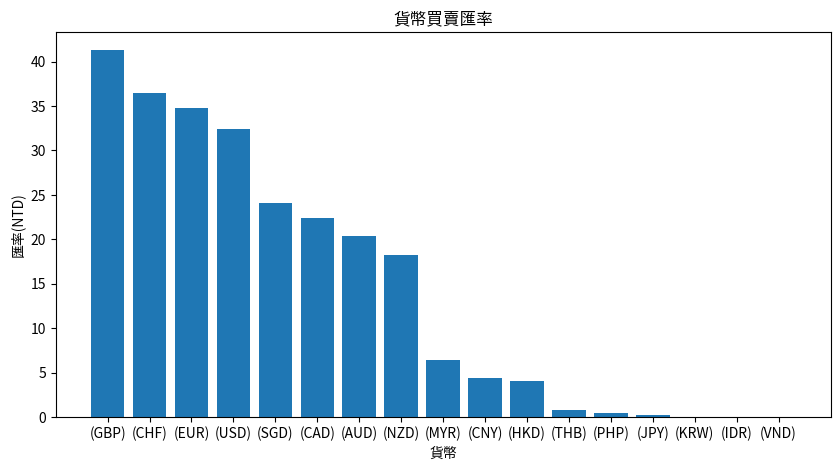

In [12]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager
import matplotlib as mlp
fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')

#建立畫布
fig = plt.figure(figsize=(10, 5))

# 在fig上製作一個axes
ax_1 = fig.add_subplot(1,1,1)
ax_1.bar(df['幣別'].apply(lambda x: x.split()[-1]),df['本行現金買入'])
ax_1.set_title('貨幣買賣匯率')
ax_1.set_xlabel('貨幣')
ax_1.set_ylabel('匯率(NTD)')
plt.show()